ATHARVA AGIWAL 

# **MACHINE LEARNING ASSIGNMENT 1**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ML_dataset.csv')
display(df)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## **Feature Engineering Task 1**

In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns[1:]
#identifying which column contains continuous numeric data
num_cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
categorical_cols = list(set(cols)-set(num_cols))
categorical_cols
#columns with categorical data

['id', 'diagnosis']

In [ ]:
#finding missing total missing values in each column
missing_values = sum(list(df.isna().sum()))
#print(missing_values)
#there were 7 missing values initially

In [ ]:
for col in df:
    if col not in ['id','diagnosis']:
        mean_value = df[col].mean()
        #calculating the mean value
        df[col].fillna(value=mean_value,inplace=True)
        #replacing empty cell with the mean value calculated as mentioned in task 1

## **Feature Engineering Task 2**

In [ ]:
df_norm = df
#here I created a dummy dataframe and normalized it as mentioned in task 2
for col in df_norm:
    if col not in ['id','diagnosis']:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()
df_norm

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,1.102422,-2.071512,1.268389,0.983510,1.567087,3.280628,2.650837,2.530249,...,1.885031,-1.358098,2.301575,1.998658,1.306537,2.614365,2.107374,2.294058,2.748204,1.935312
1,842517,M,1.836635,-0.353322,1.684639,1.907030,-0.826235,-0.486643,-0.025417,0.547662,...,1.804340,-0.368879,1.533776,1.887973,-0.375282,-0.430066,-0.147968,1.086129,-0.243675,0.280943
2,84300903,M,1.586206,0.455786,1.565122,1.557513,0.941382,1.052000,1.361666,2.035440,...,1.510541,-0.023953,1.346291,1.454016,0.526944,1.081980,0.853340,1.953282,1.151242,0.201214
3,84348301,M,-0.767260,0.253509,-0.595257,-0.763792,3.280667,3.399917,1.913989,1.450431,...,-0.281217,0.133866,-0.249720,-0.551147,3.391291,3.889975,1.987485,2.173873,6.040726,4.930672
4,84358402,M,1.756953,-1.150804,1.775308,1.824624,0.280125,0.538866,1.369198,1.427237,...,1.297434,-1.465481,1.337363,1.218589,0.220362,-0.313119,0.611645,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,2.118368,0.720838,2.059677,2.341795,1.040926,0.218868,1.945370,2.318924,...,1.899514,0.117596,1.751022,2.012713,0.378033,-0.273077,0.662958,1.627719,-1.358963,-0.708467
565,926682,M,1.711420,2.083301,1.614577,1.722326,0.102368,-0.017817,0.691347,1.262558,...,1.535369,2.045599,1.420690,1.492668,-0.690623,-0.394473,0.235195,0.733182,-0.531387,-0.973122
566,926954,M,0.706858,2.043775,0.670803,0.577445,-0.839745,-0.038646,0.045004,0.105684,...,0.560868,1.373645,0.578492,0.426222,-0.808876,0.350427,0.325352,0.413705,-1.103578,-0.318129
567,927241,M,1.845172,2.334403,1.981372,1.733693,1.524426,3.269267,3.294795,2.656528,...,1.959515,2.235958,2.301575,1.650790,1.429169,3.901415,3.195002,2.287972,1.917396,2.217684


In [ ]:
missing_value1 = df['diagnosis'].isna().sum()
missing_value2 = df['id'].isna().sum()
#finding missing value in our categorical data
#here there was no missing value in both
# print(missing_value1,missing_value2)

0 0


In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## **Perceptron Learning Algorithm**

In [ ]:
#task 2 was accomplished

class Perceptron:
    
    def __init__(self, learning_rate = 0.001, epochs = 1000):
        self.weights = None
        self.bias = None
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation(self, z):
        return np.heaviside(z, 0)
    
#                       0   if x1 < 0
# heaviside(x1, x2) =  x2   if x1 == 0
# here x2 = 0
#                       1   if x1 > 0

    def fit(self, X, y):
        columns = X.shape[1]
        # This will give the number of columns is 2-d array 
        # Initializing weights and bias with zeros
        self.weights = np.zeros((columns))
        self.bias = 0
        
        # Iterating until the number of epochs
        for epoch in range(self.epochs):
            
            # Traversing through the entire training set
            for i in range(len(X)):
                z = np.dot(X, self.weights) + self.bias # Finding the dot product and adding the bias
                y_pred = self.activation(z) # Passing through an activation function
                
                # old_weight = self.weights 
                #Updating weights and bias
                self.weights = self.weights + self.learning_rate * (y[i] - y_pred[i]) * X[i]
                self.bias = self.bias + self.learning_rate * (y[i] - y_pred[i])
                
                # if((old_weight==self.weights).all()):
                  # print("Weights are unchanged from the previous iteration")
                # else:
                  # print(self.weights)
        return self.weights, self.bias
    
    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self.activation(z)

## **PM1**

In [ ]:

X = df.iloc[:, 2:].values
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)
  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
# np.random.seed(1)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]



 

In [ ]:
perceptron = Perceptron()

perceptron.fit(X_train, y_train)

# Make predictions on the testing dataset
y_pred = perceptron.predict(X_test)

# Calculate the accuracy of the model on the testing dataset
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

Accuracy: 96.84210526315789 %


## **PM2**

In [ ]:
X = df.iloc[:, 2:].values
# Get Malignant cancer datapoints and label them as 1, and begnign as 0
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)
  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
np.random.seed(1)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

# Shuffle the train_indices
np.random.shuffle(train_indices)
X_train, y_train = X[train_indices], y[train_indices]

X_test, y_test = X[test_indices], y[test_indices]
print(X_test)

[[ 1.71142018  2.08330086  1.61457747 ...  0.73318211 -0.53138705
  -0.97312203]
 [ 1.5833598   0.55576183  1.56100073 ...  1.68705047  1.84950885
  -0.26386948]
 [ 1.29024384 -0.39284689  1.30548091 ...  1.87417297  1.45188469
   0.43763168]
 ...
 [ 0.87760486  1.21606789  0.91395861 ...  1.14546014  0.66633451
   2.76581825]
 [-0.02450933  0.45578591 -0.09204765 ... -0.53210068 -1.09064705
  -0.43052445]
 [-0.30908794 -0.20219513 -0.38795608 ... -0.98089041 -1.47695671
  -1.23224006]]


In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

#accuracy of PM2 matches with accuracy of PM1

Accuracy: 97.89473684210527 %


## **PM3**

In [ ]:
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)


# np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")


Accuracy: 94.21052631578948 %


## **PM4**

In [ ]:
shuffled_cols = df.iloc[:, 2:].sample(frac=1, axis=1)
df2 = pd.concat([df.iloc[:, :2], shuffled_cols], axis=1)
X = df2.iloc[:, 2:].values
y = np.where(df2.iloc[:, 1].values == 'M', 1, 0)
# np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [ ]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
accuracy = np.sum(y_pred == y_test)/len(y_test) * 100
print(f"Accuracy: {accuracy} %")

#accuracy of PM2 matches with accuracy of PM1

Accuracy: 97.36842105263158 %


## **Fisher’s Linear Discriminant Analysis**


In [ ]:
# Imports
import numpy as np
import pandas as pd
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
from scipy.stats import norm as norm


In [ ]:
def find_predictions(X_test, W, threshold):
    
    # Project the Test data onto W
    proj_testdata = np.dot(W, X_test.transpose()).reshape(X_test.shape[0],1)
    
    # Compare with threshold
    predictions = (proj_testdata >= threshold).astype(int).reshape(X_test.shape[0],1)
    
    return proj_testdata, predictions

In [ ]:
def plot_projections(projections, y_test, threshold):
    proj_pred_data = pd.DataFrame(np.concatenate((projections, y_test.reshape(-1, 1)), axis=1))
    

    proj1_pred = proj_pred_data.loc[proj_pred_data[1] == 1][[0]]
    proj2_pred = proj_pred_data.loc[proj_pred_data[1] == 0][[0]]    
    plt.figure(figsize=(8, 5))
    plt.plot(proj1_pred, np.ones(proj1_pred.shape), '.', color='b', label='Malignant (value 1)')
    plt.plot(proj2_pred, np.ones(proj2_pred.shape), '.', color='r',label='Benign (value 0)')
    plt.plot([threshold], [1], '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Projections onto W vector. Threshold = '+ str(threshold))
    plt.show()


In [ ]:
def find_w_cordinates(X_train1, X_train2):
    # X_train1 is the positive class and X_train2 is the negative class
    
    # 1. Find M1, M2, Cov1, Cov2
    Mean1 = np.mean(X_train1,axis=0)
    Mean2 = np.mean(X_train2,axis=0)
    Mean_difference = np.subtract(Mean1,Mean2)

    Cov1 = np.cov(np.transpose(X_train1))
    Cov2 = np.cov(np.transpose(X_train2))

    # 2. Within class spread Sw = Cov1 + Cov2  
    Sw_inv = np.linalg.inv(np.add(Cov1,Cov2))
    
    # 3. W = (Sw_inv).(M1-M2)
    W = np.dot(Sw_inv,Mean_difference)
    
    # 4. Normalise W
    W_norm = W / np.linalg.norm(W)
    
    # Note:
    # change X limits for pdf plot to -30 to 30 if W is used
    # change X limits for pdf plot to -3 to 3 if normalised W is used
    
    return W_norm

In [ ]:
def solve_pdfs(pdf_mean_1, pdf_mean_2, pdf_std_1, pdf_std_2):
    coeff1 = 1/(2*pdf_std_1**2) - 1/(2*pdf_std_2**2)
    coeff2 = pdf_mean_2/(pdf_std_2**2) - pdf_mean_1/(pdf_std_1**2)
    coeff3 = pdf_mean_1**2 /(2*pdf_std_1**2) - pdf_mean_2**2 / (2*pdf_std_2**2) - np.log(pdf_std_2/pdf_std_1)

    coeffs = [coeff1, coeff2, coeff3]
    roots_of_eq = np.roots(coeffs)
    threshold = roots_of_eq[1]
    #found by experimenting
    #take[1] when using normalized value
    #else take[0] as [1] gives negative solution or the other incorrect solution
    return threshold

In [ ]:
def plot_pdfs(mean1, mean2, std1, std2, threshold):
    # change X limits for pdf plot to -3 to 3 if normalised W is used. Otherwise set it to -30 to 30 
    X_axis = np.linspace(-1,1,100000)
    plt.plot(X_axis, norm.pdf(X_axis, mean1, std1),'-', color='b',label='Malignant (value 1)')    
    plt.plot(X_axis, norm.pdf(X_axis, mean2, std2),'-', color='r',label='Benign (value 0)')
    plt.plot([threshold], norm.pdf([threshold], mean1, std1), '*', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Normal distributions. Threshold = '+ str(threshold))
    plt.show()
    print('\n')

In [ ]:
def find_threshold(X_train1, X_train2, W):
    # Threshold = point of intersection of the (probability density functions)
    
    # 1. Find Projections on the line W
    Proj1 = np.dot(W,X_train1.transpose())
    Proj2 = np.dot(W,X_train2.transpose())
    
    # 2. Find Means of the projected data for positive and negative classes
    proj_mean1 = np.mean(Proj1)
    proj_mean2 = np.mean(Proj2)
    print('malignant_mean',proj_mean1,' benign_mean2',proj_mean2)
    # 3. Find Std deviations of the projected data for positive and negative classes
    proj_std1 = np.std(Proj1)
    proj_std2 = np.std(Proj2)
    print('malignant_std',proj_std1,' benign_std2',proj_std2)
    # 4. Solve the equations

    threshold = solve_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2)
    print("threshold",threshold)
    print('\n')
    # Plot the pdfs
    plot_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2, threshold)
    return threshold


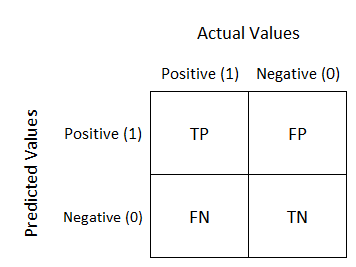

**“TP” = true positive; “FN” = false negative; “FP” = false positive; “TN” = true negative.**

In [ ]:
def matrix(y_test , y_predicted):
  li1 = []
  for i in y_test:
          li1.append(i)
  li = []
  for i in y_predicted:
          li.append(i[0])
  
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range(len(li)):
    if li[i]==li1[i]:
      if li[i]==1:
        TP += 1
      else:
        TN += 1
    else:
        if li[i]==1:
          FP += 1
        else:
          FN += 1
  return TP,TN,FP,FN

In [ ]:
def accuracy(y_test , y_predicted):
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return (TP + TN)/(TP + TN + FP + FN)
    # Accuracy = (TP + TN)/(TP + TN + FP + FN)


In [ ]:
def precision(y_test , y_predicted):
    # Precision = (TP)/(TP + FP) = True pos out of the actual results
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return TP/(TP + FP)

In [ ]:
def recall(y_test , y_predicted):
    # Recall = (TP)/(TP + FN) = True pos out of the predicted results
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return TP/(TP + FN)

In [ ]:
def f_score(y_test , y_predicted):
    # F_Score = 2PR/(P+R)
    P = precision(y_test , y_predicted)
    R = recall(y_test , y_predicted)
    return 2*P*R/(P + R)

In [ ]:
def fisher(X_train1, X_train2, X_test, y_test):
    
    # 1. Find Projection Line
    W = find_w_cordinates(X_train1, X_train2)
    
    # 2. Find Threshold
    threshold = find_threshold(X_train1, X_train2, W)
    
    # 3. Find Predictions for the Test Data by Projecting onto W and comparing to the threshold
    projections, y_predicted = find_predictions(X_test, W, threshold)
    
    # Plot the projections
    plot_projections(projections, y_test, threshold)
    print('\n')
    print('W:\n',W)
    print('\n')
    print('Threshold:',threshold)
    print('accuracy:',accuracy(y_test , y_predicted))
    
    print("precision:",precision(y_test , y_predicted))
    print("recall:",recall(y_test , y_predicted))
    print("f score:",f_score(y_test , y_predicted))

## **FLDM1**

In [ ]:
df_norm = df
#here I created a dummy dataframe and normalized it as mentioned in task 2
for col in df_norm:
    if col not in ['id','diagnosis']:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()
        
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)

  #create a numpy array and put value where the cancer is malignant to 1 if not then 0
  #above function is a compact form of the below function

  # li = []
  # for i in df.iloc[:,1].values:
  #     if i == 'M':
  #         li.append(1)
  #     else:
  #         li.append(-1)
  # y = np.array(li)

  # set a random seed for reproducibility
np.random.seed(13123)
  # shuffle the indices of the samples
indices = np.arange(len(X))
  #The np.arange() function is used to create an array of indices 
      #corresponding to the number of samples in the dataset
np.random.shuffle(indices)

  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)


X_train1 = X_train[y_train == 1]
X_train2 =  X_train[y_train == 0]

malignant_mean 0.5759037768593619  benign_mean2 -0.33495743395722954
malignant_std 0.275229610164177  benign_std2 0.22324542339513603
threshold 0.0870530650206827




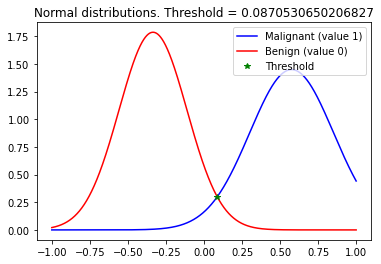

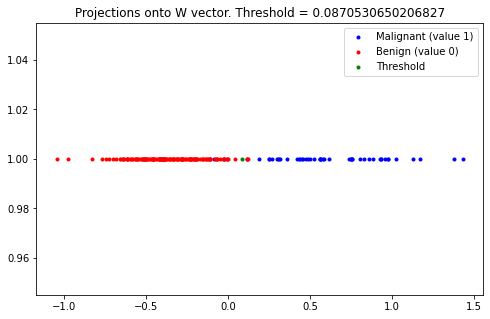



W:
 [-0.07020747  0.02349569  0.07979575 -0.02800129 -0.0076535  -0.20505715
  0.08392987  0.10266201  0.01025452 -0.04157101  0.18381503 -0.00984625
 -0.03162539 -0.07722896  0.03107518  0.04152803 -0.15272481  0.10168187
  0.00956984 -0.0291826   0.69699245  0.05711523  0.08870868 -0.56022095
  0.06068807 -0.02479384  0.1322392   0.00177734  0.04686823  0.1137293 ]


Threshold: 0.0870530650206827
accuracy: 0.9789473684210527
precision: 0.9583333333333334
recall: 0.9583333333333334
f score: 0.9583333333333334


In [ ]:
fisher(X_train1, X_train2, X_test, y_test)

## **FLDM2**

In [ ]:
shuffled_cols = df.iloc[:, 2:].sample(frac=1, axis=1)
df2 = pd.concat([df.iloc[:, :2], shuffled_cols], axis=1)
X = df2.iloc[:, 2:].values
y = np.where(df2.iloc[:, 1].values == 'M', 1, 0)
np.random.seed(13123)
indices = np.arange(len(X))
np.random.shuffle(indices)
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

X_train1 = X_train[y_train == 1]
X_train2 =  X_train[y_train == 0]

malignant_mean 0.5759037768593805  benign_mean2 -0.33495743395724026
malignant_std 0.275229610164186  benign_std2 0.223245423395143
threshold 0.08705306502068533




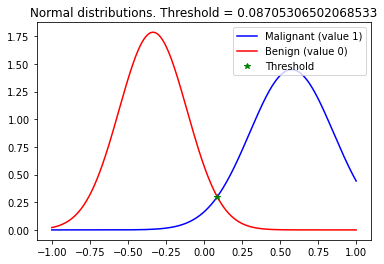

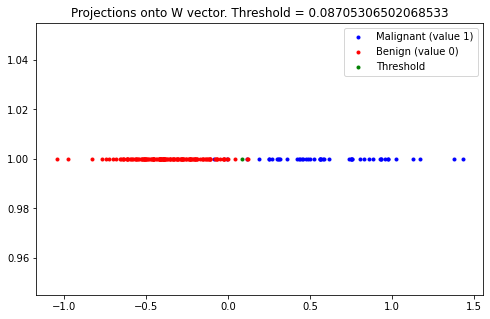



W:
 [ 0.10266201  0.04686823  0.06068807  0.1137293  -0.56022095 -0.07020747
  0.01025452 -0.20505715 -0.0076535   0.10168187  0.03107518  0.00177734
  0.08870868  0.69699245  0.00956984  0.1322392   0.08392987  0.02349569
  0.05711523 -0.0291826   0.18381503  0.04152803 -0.00984625 -0.02800129
  0.07979575 -0.15272481 -0.02479384 -0.03162539 -0.07722896 -0.04157101]


Threshold: 0.08705306502068533
accuracy: 0.9789473684210527
precision: 0.9583333333333334
recall: 0.9583333333333334
f score: 0.9583333333333334


In [ ]:
fisher(X_train1, X_train2, X_test, y_test)

## **Logistic Regression**

In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


**corrected**

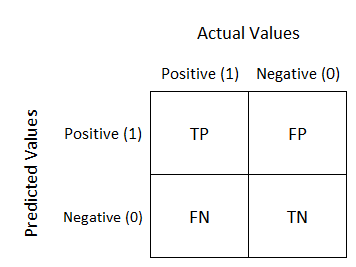

**“TP” = true positive; “FN” = false negative; “FP” = false positive; “TN” = true negative.**

In [ ]:
#function to calculate sigmoid
def sigmoid(x):
    return 1/(1 + np.exp(-x))  #changes made -x to x
#hypothesis for logistic regression
def hypothesis(X,theta):
    return sigmoid(np.dot(X, theta))
#binary cross entropy cost function, i.e derivative which we have to minimize
def cost(X_train,y_train,theta):
  h = hypothesis(X_train,theta)
  h = np.clip(h, 1e-7, 1-1e-7) #done to avoid zero in log warning as value coming close to zero
                                  #may be interpreted as 0
  arr = []
  for i in range(len(h)):
    arr.append(h[i][0])
  h = np.array(arr)
  return (-1/len(y_train))*(np.sum((y_train * np.log(h)) + (1-y_train)*np.log(1-h)))

In [ ]:
#function to predict the class of a test data point
def predict(X, theta, threshold=0.5):
    return (hypothesis(X, theta) >= threshold).astype(int)

In [ ]:
def matrix(y_test , y_predicted):
  li1 = []
  for i in y_test:
          li1.append(i)
  li = []
  for i in y_predicted:
          li.append(i[0])
  TP = 0
  TN = 0
  FP = 0
  FN = 0
  for i in range(len(li)):
    if li[i]==li1[i]:
      if li[i]==1:
        TP += 1
      else:
        TN += 1
    else:
        if li[i]==1:
          FP += 1
        else:
          FN += 1
  return TP,TN,FP,FN


def accuracy(y_test , y_predicted):
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return (TP + TN)/(TP + TN + FP + FN)
    # Accuracy = (TP + TN)/(TP + TN + FP + FN)

def recall(y_test , y_predicted):
    # Recall = (TP)/(TP + FN) = True pos out of the predicted results
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return TP/(TP + FN)

#function to calculate precision of the classifier
def precision(y_test , y_predicted):
    # Precision = (TP)/(TP + FP) = True pos out of the actual results
    TP,TN,FP,FN = matrix(y_test , y_predicted)
    return TP/(TP + FP)

def f_score(y_test , y_predicted):
    # F_Score = 2PR/(P+R)
    P = precision(y_test , y_predicted)
    R = recall(y_test , y_predicted)
    return 2*P*R/(P + R)

# **LR1**

In [ ]:
def batch_gradient_descent(X,y,theta,learning_rate,iterations):
    cost_history=np.zeros(iterations)
    m=len(y)
    for i in range(iterations):
        li1 = []
        for j in hypothesis(X,theta):
          li1.append(j[0])
          a = np.array(li1)
        gradient = (1/m)* np.dot(X.T, (a - y).reshape(379, 1))
        #w=w-ita*gradient
        theta = theta - learning_rate*gradient
        cost_history[i] = cost(X, y, theta)
    plt.title('Learning curve (Cost Function vs Iterations), Weights = normal, LR = {} , itr = {}'.format(learning_rate, iterations))
    plt.plot(list(range(iterations)), cost_history, '-r')
        
    return theta,cost_history

**2/3 Training and rest 1/3 for Testing as told by sir**

In [ ]:
# Without feature engineering the result are as follows:
cols = df.columns
num_cols = df._get_numeric_data().columns[1:]
categorical_cols = list(set(cols)-set(num_cols))

#finding missing total missing values in each column
missing_values = sum(list(df.isna().sum()))
#print(missing_values)
#there were 7 missing values initially

for col in df:
    if col not in ['id','diagnosis']:
        mean_value = df[col].mean()
        #calculating the mean value
        df[col].fillna(value=mean_value,inplace=True)
        #replacing empty cell with the mean value calculated as mentioned in task 1
        
X = df.iloc[:, 2:].values
y = np.where(df.iloc[:, 1].values == 'M', 1, 0)

  #concatenate a columns of ones (to accomodate the bias)
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 

  #gaussian weight initialisations can be tried:
  #theta=np.random.randn(X.shape[1],1)
  #1. initialise weights to zeroes
theta1=np.zeros((X.shape[1],1))
  #split the data into training and testing data, change the test split here
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

accuracy: 0.9842105263157894
precision: 1.0
recall: 0.958904109589041
f score: 0.9790209790209791


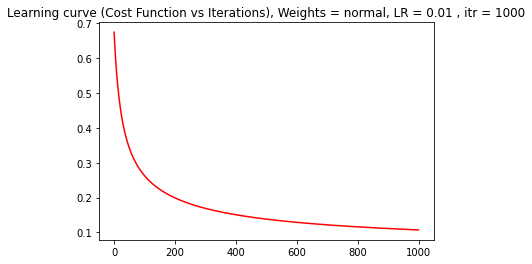

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)
y_predicted = predict(X_test,theta[0]) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

Q) What happens to testing accuracy when you vary the decision probability threshold from 0.5 to 0.3, 0.4, 0.6 and 0.7.

0.3

In [ ]:
y_predicted = predict(X_test,theta[0],0.3) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9736842105263158
precision: 0.9594594594594594
recall: 0.9726027397260274
f score: 0.9659863945578231


In [ ]:
y_predicted = predict(X_test,theta[0],0.4) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9894736842105263
precision: 1.0
recall: 0.9726027397260274
f score: 0.9861111111111112


In [ ]:
y_predicted = predict(X_test,theta[0],0.6) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.968421052631579
precision: 1.0
recall: 0.9178082191780822
f score: 0.9571428571428571


In [ ]:
y_predicted = predict(X_test,theta[0],0.7) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9473684210526315
precision: 1.0
recall: 0.863013698630137
f score: 0.9264705882352942


You must implement the above two learning tasks using Batch Gradient Descent, Mini-batch Gradient Descent and Stochastic Gradient Descent using learning rates 0.01, 0.001 and 0.0001. Plot the learning curves (Cost Function vs Iterations) for the same.

## **Batch Gradient Descent**

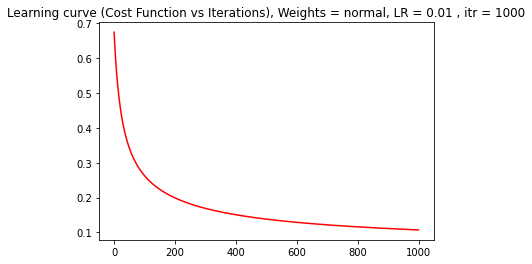

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)

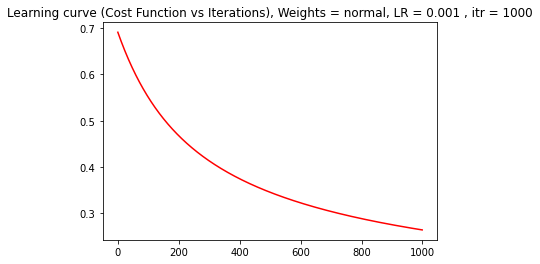

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.001,1000)

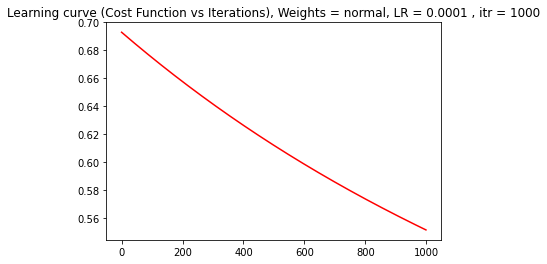

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.0001,1000)

**Explaination:**

**The learning rate α determines how rapidly we update the parameters. If the learning rate is too large, we may "overshoot" the optimal value. Similarly, if it is too small, we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.**

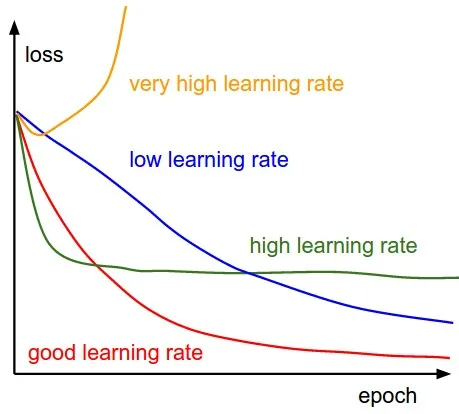

**If you have low learning rate means your cost function will decrease slowly but in case of large learning rate cost function will decrease very fast.**

***Graph of Batch, Stochastic, Mini-Batch***

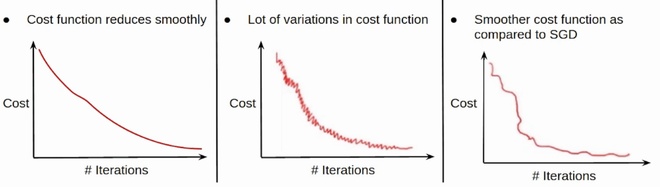

# **LR2**

##**Applying Feature Engineering 1 to the dataset**



In [ ]:
cols = df.columns
num_cols = df._get_numeric_data().columns[1:]
categorical_cols = list(set(cols)-set(num_cols))
categorical_cols
#columns with categorical data
print("The cols that contain categorical data are {}".format(categorical_cols))

#finding missing total missing values in each column
missing_values = sum(list(df.isna().sum()))
#print(missing_values)
#there were 7 missing values initially

for col in df:
    if col not in ['id','diagnosis']:
        mean_value = df[col].mean()
        #calculating the mean value
        df[col].fillna(value=mean_value,inplace=True)
        #replacing empty cell with the mean value calculated as mentioned in task 1
df_norm = df
#here I created a dummy dataframe and normalized it as mentioned in task 2
for col in df_norm:
    if col not in ['id','diagnosis']:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()

The cols that contain categorical data are ['id', 'diagnosis']


In [ ]:
# Creating train and test splits
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)

#concatenate a columns of ones (to accomodate the bias)
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 

  #gaussian weight initialisations can be tried:
  #theta=np.random.randn(X.shape[1],1)
  #1. initialise weights to zeroes
theta1=np.zeros((X.shape[1],1))
  #split the data into training and testing data, change the test split here
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

## **Batch Gradient Descent**

In [ ]:
#function to predict the class of a test data point
def predict(X, theta, threshold=0.5):
    return (hypothesis(X, theta) >= threshold).astype(int)

accuracy: 0.9842105263157894
precision: 1.0
recall: 0.958904109589041
f score: 0.9790209790209791


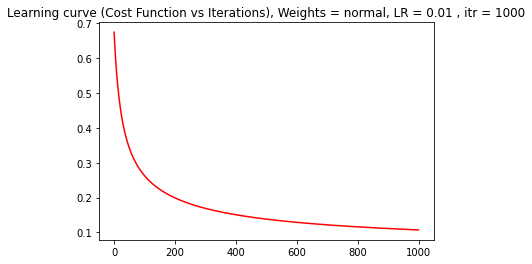

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)
y_predicted = predict(X_test,theta[0]) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

0.3

In [ ]:
y_predicted = predict(X_test,theta[0],0.3) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9736842105263158
precision: 0.9594594594594594
recall: 0.9726027397260274
f score: 0.9659863945578231


0.4

In [ ]:
y_predicted = predict(X_test,theta[0],0.4) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9894736842105263
precision: 1.0
recall: 0.9726027397260274
f score: 0.9861111111111112


0.6

In [ ]:
y_predicted = predict(X_test,theta[0],0.6) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.968421052631579
precision: 1.0
recall: 0.9178082191780822
f score: 0.9571428571428571


0.7

In [ ]:
y_predicted = predict(X_test,theta[0],0.7) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9473684210526315
precision: 1.0
recall: 0.863013698630137
f score: 0.9264705882352942


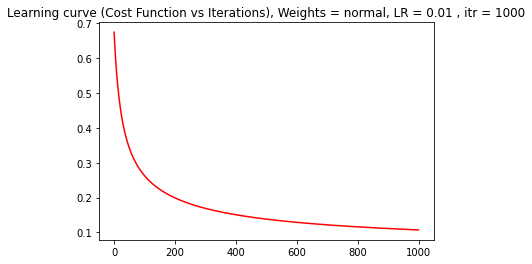

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)

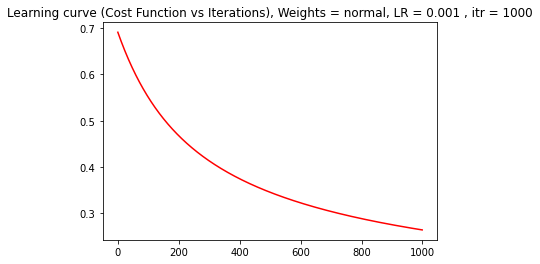

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.001,1000)

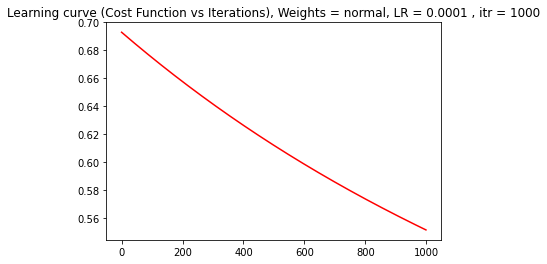

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.0001,1000)

**If you have low learning rate means your cost function will decrease slowly but in case of large learning rate cost function will decrease very fast.**

## **Applying Feature Engineering 2 to normalise the dataset**

In [ ]:
df_norm = df
#here I created a dummy dataframe and normalized it as mentioned in task 2
for col in df_norm:
    if col not in ['id','diagnosis']:
        df_norm[col] = (df_norm[col] - df_norm[col].mean()) / df_norm[col].std()

In [ ]:
# Creating train and test splits
X = df_norm.iloc[:, 2:].values
y = np.where(df_norm.iloc[:, 1].values == 'M', 1, 0)

#concatenate a columns of ones (to accomodate the bias)
ones=np.ones((X.shape[0],1))
X=np.concatenate((ones,X),axis=1) 

  #gaussian weight initialisations can be tried:
  #theta=np.random.randn(X.shape[1],1)
  #1. initialise weights to zeroes
theta1=np.zeros((X.shape[1],1))
  #split the data into training and testing data, change the test split here
np.random.seed(1)
indices = np.arange(len(X))
np.random.shuffle(indices)
  # split the indices into training and testing sets as ***mentioned by Bhanu Sir***
n_train = int(len(X) * 2/3)
train_indices, test_indices = indices[:n_train], indices[n_train:]

  # create the training and testing feature and target arrays
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

## **Batch Gradient Descent**

accuracy: 0.9842105263157894
precision: 1.0
recall: 0.958904109589041
f score: 0.9790209790209791


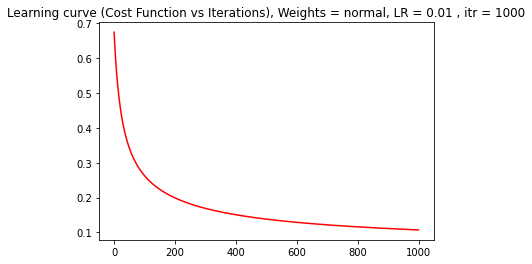

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)
y_predicted = predict(X_test,theta[0]) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))


0.3

In [ ]:
y_predicted = predict(X_test,theta[0],0.3) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9736842105263158
precision: 0.9594594594594594
recall: 0.9726027397260274
f score: 0.9659863945578231


0.4

In [ ]:
y_predicted = predict(X_test,theta[0],0.4) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9894736842105263
precision: 1.0
recall: 0.9726027397260274
f score: 0.9861111111111112


0.6

In [ ]:
y_predicted = predict(X_test,theta[0],0.6) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.968421052631579
precision: 1.0
recall: 0.9178082191780822
f score: 0.9571428571428571


0.7

In [ ]:
y_predicted = predict(X_test,theta[0],0.7) #we put inside it the respective threshold needed
print("accuracy:" , accuracy(y_test , y_predicted))
print("precision:",precision(y_test , y_predicted))
print("recall:",recall(y_test , y_predicted))
print("f score:",f_score(y_test , y_predicted))

accuracy: 0.9473684210526315
precision: 1.0
recall: 0.863013698630137
f score: 0.9264705882352942


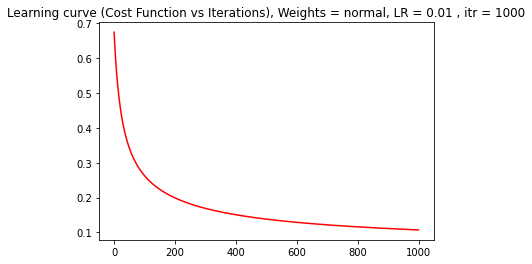

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.01,1000)

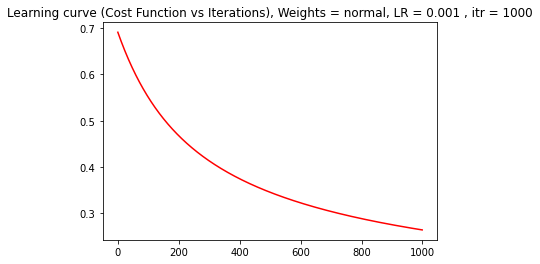

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.001,1000)

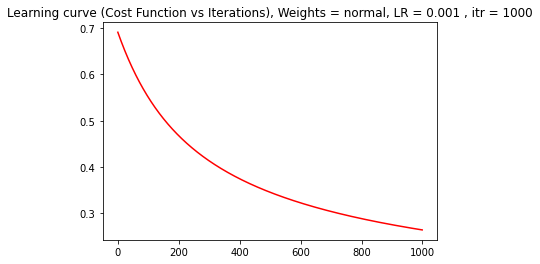

In [ ]:
theta = batch_gradient_descent(X_train,y_train,theta1,0.001,1000)

**If you have low learning rate means your cost function will decrease slowly but in case of large learning rate cost function will decrease very fast.**